In [12]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("LoanPrediction.csv")

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.dropna(inplace=True)

In [6]:
df['Dependents'] = df['Dependents'].replace('3+',3)
df['Dependents'] = df['Dependents'].replace('0',0)
df['Dependents'] = df['Dependents'].replace('1',1)
df['Dependents'] = df['Dependents'].replace('2',2)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Married'] = encoder.fit_transform(df['Married'])
df['Education'] = encoder.fit_transform(df['Education'])
df['Self_Employed'] = encoder.fit_transform(df['Self_Employed'])
df['Property_Area'] = encoder.fit_transform(df['Property_Area'])
df['Loan_Status'] = encoder.fit_transform(df['Loan_Status'])

In [9]:
x = df.drop(columns=['Loan_Status','Loan_ID'], axis=1)
y = df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.35591879893736017, 0.98, 'X[9] <= 0.5\ngini = 0.43\nsamples = 384\nvalue = [120, 264]'),
 Text(0.13870246085011187, 0.94, 'X[6] <= 8115.0\ngini = 0.209\nsamples = 59\nvalue = [52, 7]'),
 Text(0.12080536912751678, 0.9, 'X[7] <= 488.0\ngini = 0.185\nsamples = 58\nvalue = [52, 6]'),
 Text(0.1029082774049217, 0.86, 'X[5] <= 4249.5\ngini = 0.16\nsamples = 57\nvalue = [52, 5]'),
 Text(0.06711409395973154, 0.82, 'X[8] <= 240.0\ngini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.049217002237136466, 0.78, 'X[5] <= 2546.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.03131991051454139, 0.74, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06711409395973154, 0.74, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.08501118568232663, 0.78, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.13870246085011187, 0.82, 'X[5] <= 5392.5\ngini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.12080536912751678, 0.78, 'X[7] <= 146.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 

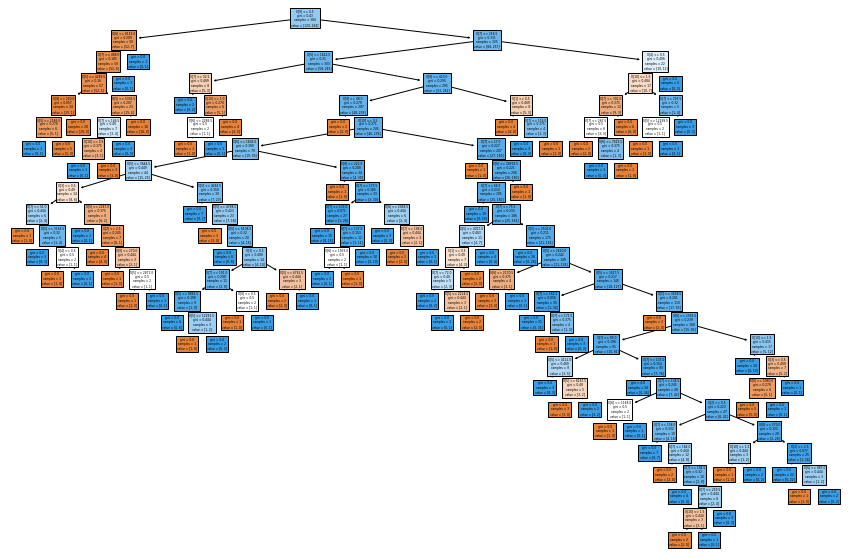

In [13]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)

In [16]:
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [17]:
ccp_alphas

array([0.        , 0.0014881 , 0.00167181, 0.00208333, 0.00208333,
       0.00208333, 0.00213068, 0.00217014, 0.00241815, 0.00252757,
       0.00252976, 0.00256293, 0.00271465, 0.00277778, 0.00297619,
       0.00306304, 0.00322421, 0.00372024, 0.00390625, 0.00390625,
       0.00390625, 0.00390625, 0.00417781, 0.00432545, 0.004329  ,
       0.00462589, 0.00463427, 0.00514499, 0.00542535, 0.00556066,
       0.00585938, 0.00696301, 0.00727441, 0.00797854, 0.11749063])

In [20]:
dtrees = []
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree.fit(x_train, y_train)
    dtrees.append(dtree)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      dtrees[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11749062907431546


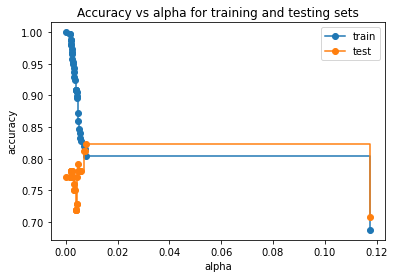

In [23]:
train_scores = [dtree.score(x_train, y_train) for dtree in dtrees]
test_scores = [dtree.score(x_test, y_test) for dtree in dtrees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [48]:
dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [49]:
pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8229166666666666

In [50]:
x_pred=dtree.predict(x_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, x_pred)

0.8046875

[Text(0.5, 0.75, 'X[9] <= 0.5\ngini = 0.43\nsamples = 384\nvalue = [120, 264]'),
 Text(0.25, 0.25, 'gini = 0.209\nsamples = 59\nvalue = [52, 7]'),
 Text(0.75, 0.25, 'gini = 0.331\nsamples = 325\nvalue = [68, 257]')]

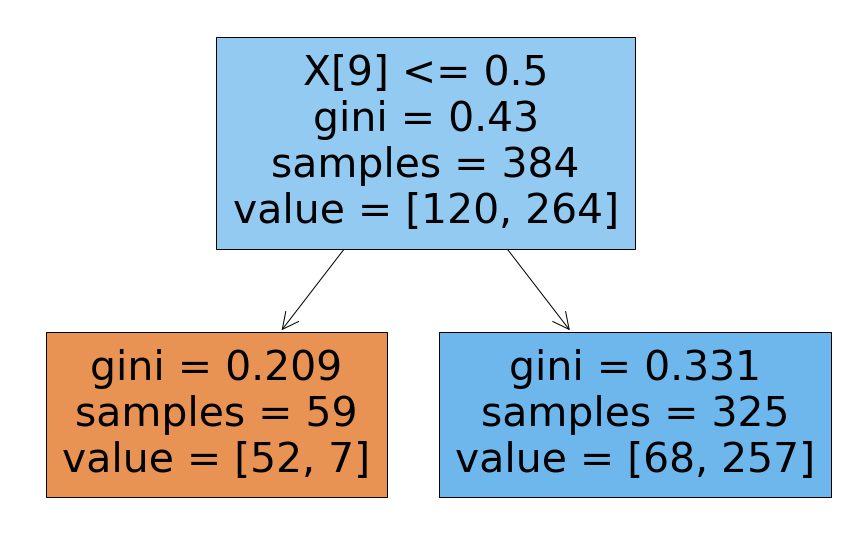

In [51]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True)